# Imports and EDA

In [1]:
%reload_ext nb_black

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.cluster import (
    KMeans,
    DBSCAN,
    AffinityPropagation,
    MeanShift,
)
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap

<IPython.core.display.Javascript object>

In [2]:
# Applying random sample to increase run time speed
final_df = pd.read_csv("./cleaned_data.csv")
final_df = final_df.sample(100000, random_state=13)
final_df.head()

,event_id,app_id,is_active,device_id,group,8,9,10,11,12,...,device_model_魅蓝,device_model_魅蓝2,device_model_魅蓝NOTE,device_model_魅蓝Note 2,device_model_魅蓝metal,device_model_麦芒3,device_model_麦芒3S,device_model_麦芒4,device_model_黄金斗士A8,device_model_黄金斗士Note8
358014,671542,-6172775651801283024,0,-5591315370762637500,M22-,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
254503,273588,1883678791934985414,1,6414313316267266281,M23-26,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91844,54515,-6590473556670600053,0,4189762977638537239,F29-32,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
411452,1438557,-2320783822570582843,0,8268943186752324161,M32-38,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
293071,375667,4373268368372483132,0,4917614238706511620,M29-31,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [3]:
# Converting object data to numeric data in group column
to_num = {
    "M22-": 0,
    "M23-26": 1,
    "M27-28": 2,
    "M29-31": 3,
    "M32-38": 4,
    "M39+": 5,
    "F23-": 6,
    "F24-26": 7,
    "F27-28": 8,
    "F29-32": 9,
    "F33-42": 10,
    "F43+": 11,
}

# Created new column for numeric group, can now drop old group column
final_df["num_group"] = final_df["group"].map(to_num)
final_df = final_df.drop(columns=["group"])
final_df.head()

,event_id,app_id,is_active,device_id,8,9,10,11,12,13,...,device_model_魅蓝2,device_model_魅蓝NOTE,device_model_魅蓝Note 2,device_model_魅蓝metal,device_model_麦芒3,device_model_麦芒3S,device_model_麦芒4,device_model_黄金斗士A8,device_model_黄金斗士Note8,num_group
358014,671542,-6172775651801283024,0,-5591315370762637500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
254503,273588,1883678791934985414,1,6414313316267266281,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
91844,54515,-6590473556670600053,0,4189762977638537239,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
411452,1438557,-2320783822570582843,0,8268943186752324161,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
293071,375667,4373268368372483132,0,4917614238706511620,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


<IPython.core.display.Javascript object>

#### Dropping features that will not be used in clustering

In [4]:
# Create copy of data frame and rename to be used for clustering
final_clust_df = final_df.copy()

<IPython.core.display.Javascript object>

In [5]:
# drop columns that won't be necessary for clustering data
final_clust_df = final_clust_df.drop(columns=["app_id", "device_id", "event_id"])

<IPython.core.display.Javascript object>

# Clustering

For clustering I will be using 2 dimensionality reduction methods (PCA and UMAP) and 3 clustering algorithms (KMeans, DBSCAN, and Gaussian Mixture Models)

First I will apply PCA to the 2 different methods. Since I am applying PCA it is important to scale and standardize the data.

In [6]:
scaler = StandardScaler()
X_std = scaler.fit_transform(final_clust_df)

<IPython.core.display.Javascript object>

## Applying PCA to the Data

In [7]:
# Computing the principal components
pca = PCA()
X_pca = pca.fit_transform(X_std)

<IPython.core.display.Javascript object>

In [8]:
# I plan to use the amount of components that add up to 60% variance.
n_components = np.sum(np.cumsum(pca.explained_variance_ratio_) < 0.60)
X_pca = X_pca[:, :n_components]

<IPython.core.display.Javascript object>

In [9]:
# check to see the amount of components being used
n_components

211

<IPython.core.display.Javascript object>

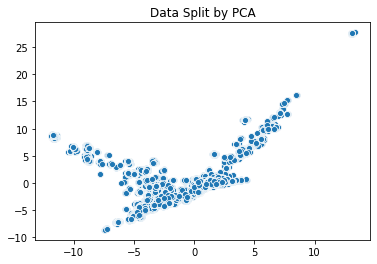

<IPython.core.display.Javascript object>

In [10]:
# adding a scatterplot to visualize how the data was split using PCA
# just eyeballing the plot there does not appear to be any noticeable clusters.
sns.scatterplot(X_pca[:, 0], X_pca[:, 1])
plt.title("Data Split by PCA")
plt.show()

### Applying KMeans to the Data

To keep cluster results consistant I am applying a random state of 13 so when I close the notebook and come back to it at later times my results will remain the same. I am choosing to create 3-10 clusters and compare those results.

In [11]:
for c in range(3, 11):
    km = KMeans(n_clusters=c, random_state=13)
    km.fit(X_pca)
    labels = km.fit_predict(X_pca)
    print(
        f"The Silhouette Score for {c} clusters: "
        + str(metrics.silhouette_score(X_pca, labels, metric="euclidean"))
    )

The Silhouette Score for 3 clusters: 0.0738751744987006
The Silhouette Score for 4 clusters: 0.08217905373970698
The Silhouette Score for 5 clusters: 0.08332799248482328
The Silhouette Score for 6 clusters: 0.08216629049614692
The Silhouette Score for 7 clusters: 0.043746927780787544
The Silhouette Score for 8 clusters: 0.03398294338340463
The Silhouette Score for 9 clusters: 0.0979305324385434
The Silhouette Score for 10 clusters: 0.028406647502535735


<IPython.core.display.Javascript object>

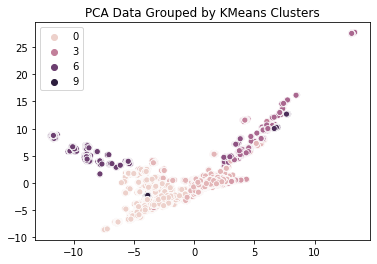

<IPython.core.display.Javascript object>

In [12]:
# Interesting to visualize how KMeans clusters the PCA data. (Using n_clusters = 10 since
# that resulted in highest Silhouette Score)
km = KMeans(n_clusters=9, random_state=13)
km.fit(X_pca)
labels = km.fit_predict(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=labels)
plt.title("PCA Data Grouped by KMeans Clusters")
plt.show()

### Applying GMM Clustering

For GMM clustering I will also be applying a random state of 13 for consistent results. Additionally, I will be using a range of 3-10 for cluster size.

In [13]:
for c in range(3, 11):
    gauss = GaussianMixture(n_components=c, random_state=13)
    clusters = gauss.fit_predict(X_pca)
    print(
        "The Silhouette Score for "
        + str(c)
        + " clusters is:"
        + str(metrics.silhouette_score(X_pca, clusters, metric="euclidean"))
    )

The Silhouette Score for 3 clusters is:-0.09458571287616477
The Silhouette Score for 4 clusters is:-0.09157728607435942
The Silhouette Score for 5 clusters is:-0.09052221711978757
The Silhouette Score for 6 clusters is:-0.02538210654483871
The Silhouette Score for 7 clusters is:-0.06982192179564681
The Silhouette Score for 8 clusters is:-0.057206564697250224
The Silhouette Score for 9 clusters is:-0.062435992008912033
The Silhouette Score for 10 clusters is:-0.061599538981124


<IPython.core.display.Javascript object>

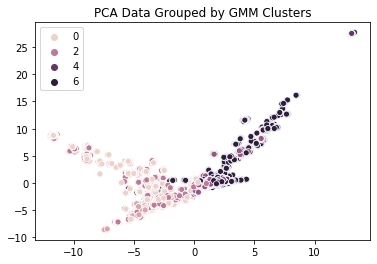

<IPython.core.display.Javascript object>

In [14]:
gauss = GaussianMixture(n_components=6, random_state=13)
gauss.fit(X_pca)
labels = gauss.fit_predict(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=labels)
plt.title("PCA Data Grouped by GMM Clusters")
plt.show()

## Applying UMAP to the Data

In [15]:
# n_neighbors of 200 provided best results, therefore that will be used for analysis
umap_results = umap.UMAP(n_components=2, n_neighbors=200)
X_umap = umap_results.fit_transform(X_std)

C:\Users\jlim7\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


<IPython.core.display.Javascript object>

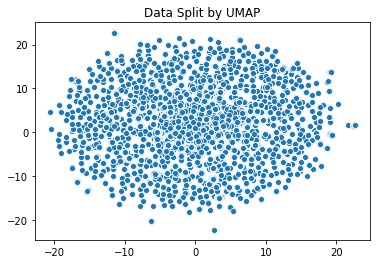

<IPython.core.display.Javascript object>

In [16]:
# adding a scatterplot to visualize how the data was split using UMAP
sns.scatterplot(X_umap[:, 0], X_umap[:, 1])
plt.title("Data Split by UMAP")
plt.show()

### Applying KMeans to the Data

In [17]:
for c in range(3, 11):
    km = KMeans(n_clusters=c, random_state=13)
    km.fit(X_umap)
    labels = km.fit_predict(X_umap)
    print(
        f"The Silhouette Score for {c} clusters: "
        + str(metrics.silhouette_score(X_umap, labels, metric="euclidean"))
    )

The Silhouette Score for 3 clusters: 0.32844317
The Silhouette Score for 4 clusters: 0.31186852
The Silhouette Score for 5 clusters: 0.3411102
The Silhouette Score for 6 clusters: 0.36044413
The Silhouette Score for 7 clusters: 0.35431817
The Silhouette Score for 8 clusters: 0.32966653
The Silhouette Score for 9 clusters: 0.33625427
The Silhouette Score for 10 clusters: 0.33860058


<IPython.core.display.Javascript object>

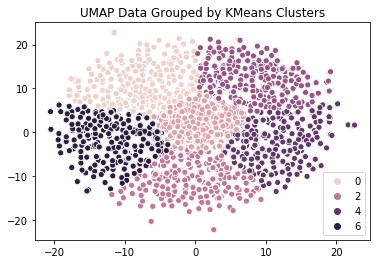

<IPython.core.display.Javascript object>

In [18]:
# Interesting to visualize how KMeans clusters the PCA data. (Using the K that resulted in highest Silhouette Score)
km = KMeans(n_clusters=6, random_state=13)
km.fit(X_umap)
labels = km.fit_predict(X_umap)
sns.scatterplot(X_umap[:, 0], X_umap[:, 1], hue=labels)
plt.title("UMAP Data Grouped by KMeans Clusters")
plt.show()

### Applying GMM Clustering to the Data

In [19]:
for c in range(3, 11):
    gauss = GaussianMixture(n_components=c, random_state=13)
    clusters = gauss.fit_predict(X_pca)
    print(
        "The Silhouette Score for "
        + str(c)
        + " clusters is:"
        + str(metrics.silhouette_score(X_pca, clusters, metric="euclidean"))
    )

The Silhouette Score for 3 clusters is:-0.09458571287616477
The Silhouette Score for 4 clusters is:-0.09157728607435942
The Silhouette Score for 5 clusters is:-0.09052221711978757
The Silhouette Score for 6 clusters is:-0.02538210654483871
The Silhouette Score for 7 clusters is:-0.06982192179564681
The Silhouette Score for 8 clusters is:-0.057206564697250224
The Silhouette Score for 9 clusters is:-0.062435992008912033
The Silhouette Score for 10 clusters is:-0.061599538981124


<IPython.core.display.Javascript object>

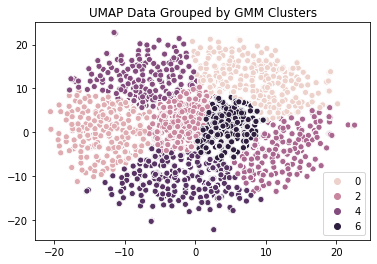

<IPython.core.display.Javascript object>

In [20]:
gauss = GaussianMixture(n_components=7, random_state=13)
gauss.fit(X_umap)
labels = gauss.fit_predict(X_umap)
sns.scatterplot(X_umap[:, 0], X_umap[:, 1], hue=labels)
plt.title("UMAP Data Grouped by GMM Clusters")
plt.show()

# Analysis

For both dimensionality reduction methods KMeans provided the best Silhouette Scores, however the scores were much better when using UMAP. The best score came from KMeans with UMAP using 6 clusters and n_neighbors = 200. The score was around 0.359. This score was still relatively low. This could be a result of only using a small subsample of the data, or requiring more EDA.

In [7]:
umap_results = umap.UMAP(n_components=2, n_neighbors=200)
X_umap = umap_results.fit_transform(X_std)
km = KMeans(n_clusters=6, random_state=13)
clusters = km.fit_predict(X_umap)

C:\Users\jlim7\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


<IPython.core.display.Javascript object>

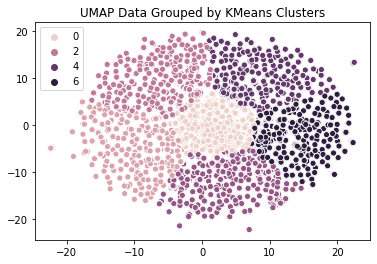

<IPython.core.display.Javascript object>

In [8]:
labels = km.fit_predict(X_umap)
sns.scatterplot(X_umap[:, 0], X_umap[:, 1], hue=labels)
plt.title("UMAP Data Grouped by KMeans Clusters")
plt.show()

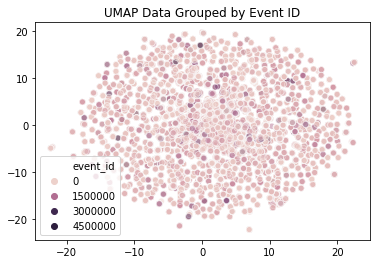

<IPython.core.display.Javascript object>

In [9]:
sns.scatterplot(X_umap[:, 0], X_umap[:, 1], hue=final_df["event_id"], alpha=0.5)
plt.title("UMAP Data Grouped by Event ID")
plt.show()

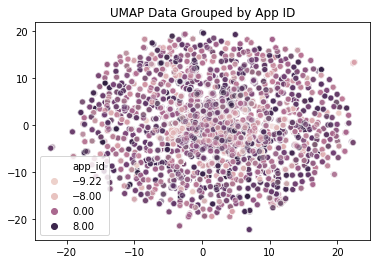

<IPython.core.display.Javascript object>

In [10]:
sns.scatterplot(X_umap[:, 0], X_umap[:, 1], hue=final_df["app_id"], alpha=0.5)
plt.title("UMAP Data Grouped by App ID")
plt.show()

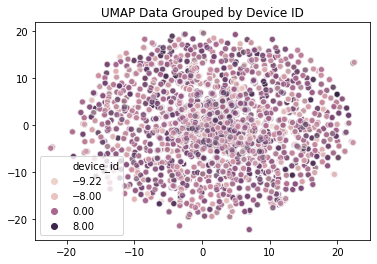

<IPython.core.display.Javascript object>

In [11]:
sns.scatterplot(X_umap[:, 0], X_umap[:, 1], hue=final_df["device_id"], alpha=0.5)
plt.title("UMAP Data Grouped by Device ID")
plt.show()

In [12]:
# adding the cluster labels to the original dataframe
final_df["Cluster"] = km.labels_

<IPython.core.display.Javascript object>

In [13]:
final_df.head()

,event_id,app_id,is_active,device_id,8,9,10,11,12,13,...,device_model_魅蓝NOTE,device_model_魅蓝Note 2,device_model_魅蓝metal,device_model_麦芒3,device_model_麦芒3S,device_model_麦芒4,device_model_黄金斗士A8,device_model_黄金斗士Note8,num_group,Cluster
358014,671542,-6172775651801283024,0,-5591315370762637500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
254503,273588,1883678791934985414,1,6414313316267266281,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
91844,54515,-6590473556670600053,0,4189762977638537239,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,0
411452,1438557,-2320783822570582843,0,8268943186752324161,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,4
293071,375667,4373268368372483132,0,4917614238706511620,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0


<IPython.core.display.Javascript object>

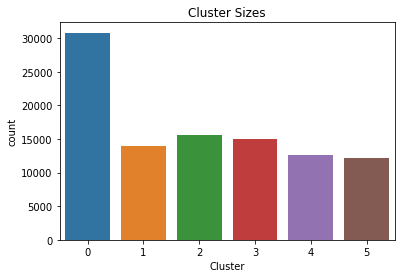

<IPython.core.display.Javascript object>

In [14]:
# Create bar chart for cluster sizes
sns.countplot(final_df["Cluster"])
plt.title("Cluster Sizes")
plt.legend
plt.show()

In [15]:
final_df["Cluster"].value_counts()

0    30810
2    15597
3    14973
1    13895
4    12565
5    12160
Name: Cluster, dtype: int64

<IPython.core.display.Javascript object>

It appears that majority of the clusters are all around the same size, with cluster 0 being an exception.

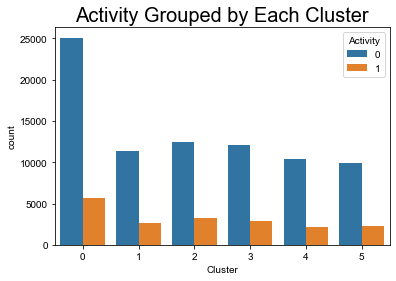

<IPython.core.display.Javascript object>

In [16]:
sns.countplot(data=final_df, x="Cluster", hue="is_active")
plt.legend(
    loc="upper right", title="Activity",
)
sns.set(rc={"figure.figsize": (10, 10)})
sns.set_style("whitegrid")
plt.title("Activity Grouped by Each Cluster", fontsize=20)
plt.show()

No noticeable pattern for activity within each cluster

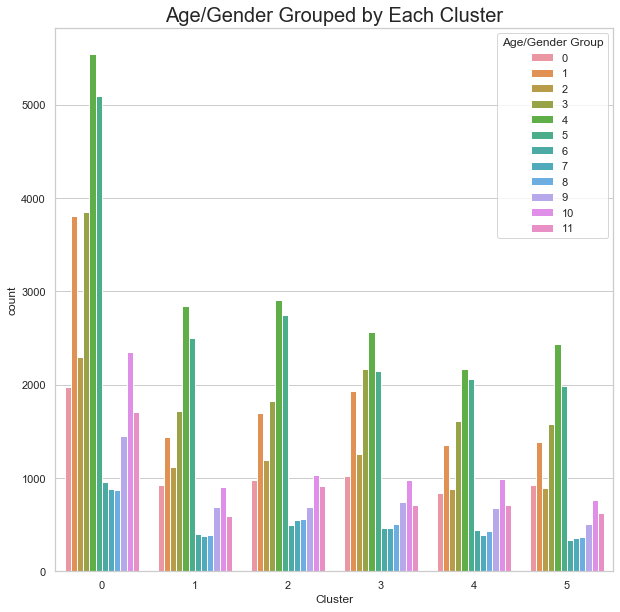

<IPython.core.display.Javascript object>

In [17]:
sns.countplot(data=final_df, x="Cluster", hue="num_group")
plt.legend(
    loc="upper right", title="Age/Gender Group",
)
sns.set(rc={"figure.figsize": (10, 10)})
sns.set_style("whitegrid")
plt.title("Age/Gender Grouped by Each Cluster", fontsize=20)
plt.show()